In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV1
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH 

/home/gil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

In [3]:
h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [4]:
encoder, autoencoder, sess = autoencoderV1(4, cuda_device=0,RNN_cell='LSTM')

../models/RNN_autoencoder1.py:67: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge_layer = L.merge([dense_1_vl, dense_1_vh], mode='concat', name='merge_layer')
/home/gil/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


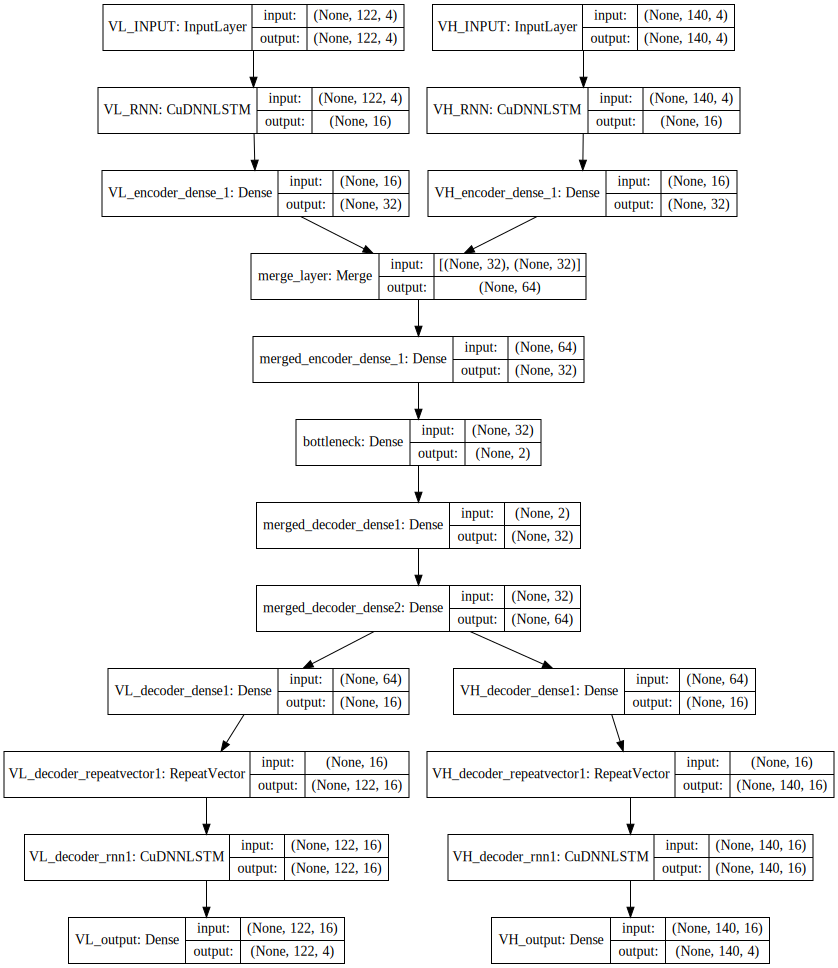

In [5]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
autoencoder.count_params()

14826

In [8]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled], 
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint('../model_weights/autoencoderV1/run2/autoencoderV1_allfeatures.hdf5',
                                                                     save_best_only=True),
                                     keras.callbacks.TensorBoard('../logs/autoencoderV1/run2')])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 1s 677us/step - loss: 0.5411 - VL_output_loss: 0.2645 - VH_output_loss: 0.2766 - val_loss: 0.5381 - val_VL_output_loss: 0.2628 - val_VH_output_loss: 0.2752
Epoch 2/2000
1706/1706 [==============================] - 1s 631us/step - loss: 0.5333 - VL_output_loss: 0.2611 - VH_output_loss: 0.2722 - val_loss: 0.5322 - val_VL_output_loss: 0.2605 - val_VH_output_loss: 0.2717
Epoch 3/2000
1706/1706 [==============================] - 1s 623us/step - loss: 0.5275 - VL_output_loss: 0.2588 - VH_output_loss: 0.2687 - val_loss: 0.5261 - val_VL_output_loss: 0.2580 - val_VH_output_loss: 0.2681
Epoch 4/2000
1706/1706 [==============================] - 1s 693us/step - loss: 0.5207 - VL_output_loss: 0.2559 - VH_output_loss: 0.2648 - val_loss: 0.5189 - val_VL_output_loss: 0.2549 - val_VH_output_loss: 0.2640
Epoch 5/2000
1706/1706 [==============================] - 1s 650us/step - loss: 0.5147 - VL_outpu

Epoch 39/2000
1706/1706 [==============================] - 1s 688us/step - loss: 0.5046 - VL_output_loss: 0.2502 - VH_output_loss: 0.2544 - val_loss: 0.5059 - val_VL_output_loss: 0.2507 - val_VH_output_loss: 0.2552
Epoch 40/2000
1706/1706 [==============================] - 1s 617us/step - loss: 0.5045 - VL_output_loss: 0.2501 - VH_output_loss: 0.2544 - val_loss: 0.5060 - val_VL_output_loss: 0.2507 - val_VH_output_loss: 0.2553
Epoch 41/2000
1706/1706 [==============================] - 1s 691us/step - loss: 0.5046 - VL_output_loss: 0.2501 - VH_output_loss: 0.2545 - val_loss: 0.5058 - val_VL_output_loss: 0.2507 - val_VH_output_loss: 0.2551
Epoch 42/2000
1706/1706 [==============================] - 1s 659us/step - loss: 0.5044 - VL_output_loss: 0.2501 - VH_output_loss: 0.2543 - val_loss: 0.5058 - val_VL_output_loss: 0.2508 - val_VH_output_loss: 0.2550
Epoch 43/2000
1706/1706 [==============================] - 1s 662us/step - loss: 0.5044 - VL_output_loss: 0.2501 - VH_output_loss: 0.2543 - 

1706/1706 [==============================] - 1s 546us/step - loss: 0.4968 - VL_output_loss: 0.2484 - VH_output_loss: 0.2484 - val_loss: 0.4984 - val_VL_output_loss: 0.2493 - val_VH_output_loss: 0.2490
Epoch 116/2000
1706/1706 [==============================] - 1s 744us/step - loss: 0.4965 - VL_output_loss: 0.2483 - VH_output_loss: 0.2481 - val_loss: 0.4976 - val_VL_output_loss: 0.2490 - val_VH_output_loss: 0.2485
Epoch 117/2000
1706/1706 [==============================] - 1s 637us/step - loss: 0.4957 - VL_output_loss: 0.2483 - VH_output_loss: 0.2473 - val_loss: 0.4961 - val_VL_output_loss: 0.2489 - val_VH_output_loss: 0.2472
Epoch 118/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.4946 - VL_output_loss: 0.2483 - VH_output_loss: 0.2463 - val_loss: 0.4955 - val_VL_output_loss: 0.2489 - val_VH_output_loss: 0.2466
Epoch 119/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.4943 - VL_output_loss: 0.2483 - VH_output_loss: 0.2460 - val_loss: 

Epoch 153/2000
1706/1706 [==============================] - 1s 563us/step - loss: 0.4893 - VL_output_loss: 0.2467 - VH_output_loss: 0.2426 - val_loss: 0.4900 - val_VL_output_loss: 0.2472 - val_VH_output_loss: 0.2428
Epoch 154/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.4888 - VL_output_loss: 0.2465 - VH_output_loss: 0.2422 - val_loss: 0.4901 - val_VL_output_loss: 0.2471 - val_VH_output_loss: 0.2430
Epoch 155/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.4887 - VL_output_loss: 0.2464 - VH_output_loss: 0.2423 - val_loss: 0.4898 - val_VL_output_loss: 0.2471 - val_VH_output_loss: 0.2428
Epoch 156/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.4885 - VL_output_loss: 0.2463 - VH_output_loss: 0.2422 - val_loss: 0.4895 - val_VL_output_loss: 0.2470 - val_VH_output_loss: 0.2425
Epoch 157/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.4886 - VL_output_loss: 0.2463 - VH_output_loss: 0.24

Epoch 191/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.4809 - VL_output_loss: 0.2412 - VH_output_loss: 0.2397 - val_loss: 0.4817 - val_VL_output_loss: 0.2420 - val_VH_output_loss: 0.2397
Epoch 192/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.4806 - VL_output_loss: 0.2410 - VH_output_loss: 0.2396 - val_loss: 0.4814 - val_VL_output_loss: 0.2416 - val_VH_output_loss: 0.2398
Epoch 193/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.4807 - VL_output_loss: 0.2409 - VH_output_loss: 0.2398 - val_loss: 0.4810 - val_VL_output_loss: 0.2416 - val_VH_output_loss: 0.2395
Epoch 194/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.4803 - VL_output_loss: 0.2409 - VH_output_loss: 0.2394 - val_loss: 0.4810 - val_VL_output_loss: 0.2416 - val_VH_output_loss: 0.2394
Epoch 195/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.4800 - VL_output_loss: 0.2407 - VH_output_loss: 0.23

Epoch 229/2000
1706/1706 [==============================] - 1s 553us/step - loss: 0.4724 - VL_output_loss: 0.2362 - VH_output_loss: 0.2362 - val_loss: 0.4724 - val_VL_output_loss: 0.2366 - val_VH_output_loss: 0.2358
Epoch 230/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.4722 - VL_output_loss: 0.2362 - VH_output_loss: 0.2360 - val_loss: 0.4733 - val_VL_output_loss: 0.2369 - val_VH_output_loss: 0.2364
Epoch 231/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.4721 - VL_output_loss: 0.2362 - VH_output_loss: 0.2359 - val_loss: 0.4729 - val_VL_output_loss: 0.2367 - val_VH_output_loss: 0.2362
Epoch 232/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.4719 - VL_output_loss: 0.2360 - VH_output_loss: 0.2359 - val_loss: 0.4727 - val_VL_output_loss: 0.2367 - val_VH_output_loss: 0.2360
Epoch 233/2000
1706/1706 [==============================] - 1s 548us/step - loss: 0.4718 - VL_output_loss: 0.2359 - VH_output_loss: 0.23

Epoch 267/2000
1706/1706 [==============================] - 1s 534us/step - loss: 0.4600 - VL_output_loss: 0.2272 - VH_output_loss: 0.2328 - val_loss: 0.4602 - val_VL_output_loss: 0.2278 - val_VH_output_loss: 0.2324
Epoch 268/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.4599 - VL_output_loss: 0.2274 - VH_output_loss: 0.2326 - val_loss: 0.4598 - val_VL_output_loss: 0.2271 - val_VH_output_loss: 0.2327
Epoch 269/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.4591 - VL_output_loss: 0.2268 - VH_output_loss: 0.2323 - val_loss: 0.4601 - val_VL_output_loss: 0.2277 - val_VH_output_loss: 0.2323
Epoch 270/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.4593 - VL_output_loss: 0.2267 - VH_output_loss: 0.2327 - val_loss: 0.4596 - val_VL_output_loss: 0.2266 - val_VH_output_loss: 0.2330
Epoch 271/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.4581 - VL_output_loss: 0.2261 - VH_output_loss: 0.23

Epoch 305/2000
1706/1706 [==============================] - 1s 531us/step - loss: 0.4426 - VL_output_loss: 0.2162 - VH_output_loss: 0.2263 - val_loss: 0.4418 - val_VL_output_loss: 0.2158 - val_VH_output_loss: 0.2261
Epoch 306/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.4411 - VL_output_loss: 0.2156 - VH_output_loss: 0.2255 - val_loss: 0.4420 - val_VL_output_loss: 0.2155 - val_VH_output_loss: 0.2264
Epoch 307/2000
1706/1706 [==============================] - 1s 545us/step - loss: 0.4406 - VL_output_loss: 0.2151 - VH_output_loss: 0.2255 - val_loss: 0.4430 - val_VL_output_loss: 0.2152 - val_VH_output_loss: 0.2278
Epoch 308/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.4408 - VL_output_loss: 0.2154 - VH_output_loss: 0.2254 - val_loss: 0.4472 - val_VL_output_loss: 0.2209 - val_VH_output_loss: 0.2264
Epoch 309/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.4403 - VL_output_loss: 0.2152 - VH_output_loss: 0.22

Epoch 343/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.4322 - VL_output_loss: 0.2090 - VH_output_loss: 0.2232 - val_loss: 0.4321 - val_VL_output_loss: 0.2094 - val_VH_output_loss: 0.2228
Epoch 344/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.4328 - VL_output_loss: 0.2099 - VH_output_loss: 0.2229 - val_loss: 0.4314 - val_VL_output_loss: 0.2092 - val_VH_output_loss: 0.2222
Epoch 345/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.4317 - VL_output_loss: 0.2092 - VH_output_loss: 0.2225 - val_loss: 0.4379 - val_VL_output_loss: 0.2152 - val_VH_output_loss: 0.2227
Epoch 346/2000
1706/1706 [==============================] - 1s 531us/step - loss: 0.4337 - VL_output_loss: 0.2114 - VH_output_loss: 0.2223 - val_loss: 0.4316 - val_VL_output_loss: 0.2096 - val_VH_output_loss: 0.2220
Epoch 347/2000
1706/1706 [==============================] - 1s 564us/step - loss: 0.4313 - VL_output_loss: 0.2092 - VH_output_loss: 0.22

Epoch 381/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.4174 - VL_output_loss: 0.2029 - VH_output_loss: 0.2145 - val_loss: 0.4168 - val_VL_output_loss: 0.2021 - val_VH_output_loss: 0.2147
Epoch 382/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.4158 - VL_output_loss: 0.2022 - VH_output_loss: 0.2136 - val_loss: 0.4149 - val_VL_output_loss: 0.2018 - val_VH_output_loss: 0.2131
Epoch 383/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.4164 - VL_output_loss: 0.2031 - VH_output_loss: 0.2133 - val_loss: 0.4148 - val_VL_output_loss: 0.2021 - val_VH_output_loss: 0.2127
Epoch 384/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.4160 - VL_output_loss: 0.2024 - VH_output_loss: 0.2136 - val_loss: 0.4194 - val_VL_output_loss: 0.2070 - val_VH_output_loss: 0.2124
Epoch 385/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.4153 - VL_output_loss: 0.2016 - VH_output_loss: 0.21

Epoch 419/2000
1706/1706 [==============================] - 1s 562us/step - loss: 0.4065 - VL_output_loss: 0.1970 - VH_output_loss: 0.2095 - val_loss: 0.4098 - val_VL_output_loss: 0.2005 - val_VH_output_loss: 0.2093
Epoch 420/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.4064 - VL_output_loss: 0.1970 - VH_output_loss: 0.2094 - val_loss: 0.4074 - val_VL_output_loss: 0.1981 - val_VH_output_loss: 0.2092
Epoch 421/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.4084 - VL_output_loss: 0.1984 - VH_output_loss: 0.2100 - val_loss: 0.4115 - val_VL_output_loss: 0.2019 - val_VH_output_loss: 0.2096
Epoch 422/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.4065 - VL_output_loss: 0.1971 - VH_output_loss: 0.2093 - val_loss: 0.4059 - val_VL_output_loss: 0.1965 - val_VH_output_loss: 0.2094
Epoch 423/2000
1706/1706 [==============================] - 1s 645us/step - loss: 0.4068 - VL_output_loss: 0.1971 - VH_output_loss: 0.20

Epoch 457/2000
1706/1706 [==============================] - 1s 531us/step - loss: 0.4014 - VL_output_loss: 0.1947 - VH_output_loss: 0.2067 - val_loss: 0.4016 - val_VL_output_loss: 0.1956 - val_VH_output_loss: 0.2060
Epoch 458/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.4018 - VL_output_loss: 0.1947 - VH_output_loss: 0.2071 - val_loss: 0.3997 - val_VL_output_loss: 0.1932 - val_VH_output_loss: 0.2065
Epoch 459/2000
1706/1706 [==============================] - 1s 548us/step - loss: 0.4020 - VL_output_loss: 0.1953 - VH_output_loss: 0.2067 - val_loss: 0.4045 - val_VL_output_loss: 0.1992 - val_VH_output_loss: 0.2053
Epoch 460/2000
1706/1706 [==============================] - 1s 580us/step - loss: 0.4008 - VL_output_loss: 0.1941 - VH_output_loss: 0.2066 - val_loss: 0.3991 - val_VL_output_loss: 0.1935 - val_VH_output_loss: 0.2056
Epoch 461/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.4009 - VL_output_loss: 0.1944 - VH_output_loss: 0.20

Epoch 495/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.3968 - VL_output_loss: 0.1921 - VH_output_loss: 0.2047 - val_loss: 0.3949 - val_VL_output_loss: 0.1900 - val_VH_output_loss: 0.2048
Epoch 496/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.3964 - VL_output_loss: 0.1918 - VH_output_loss: 0.2047 - val_loss: 0.3919 - val_VL_output_loss: 0.1893 - val_VH_output_loss: 0.2027
Epoch 497/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.3956 - VL_output_loss: 0.1905 - VH_output_loss: 0.2051 - val_loss: 0.4005 - val_VL_output_loss: 0.1959 - val_VH_output_loss: 0.2045
Epoch 498/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.3954 - VL_output_loss: 0.1902 - VH_output_loss: 0.2052 - val_loss: 0.3927 - val_VL_output_loss: 0.1896 - val_VH_output_loss: 0.2031
Epoch 499/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.3962 - VL_output_loss: 0.1913 - VH_output_loss: 0.20

Epoch 533/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.3931 - VL_output_loss: 0.1901 - VH_output_loss: 0.2030 - val_loss: 0.3927 - val_VL_output_loss: 0.1885 - val_VH_output_loss: 0.2042
Epoch 534/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3918 - VL_output_loss: 0.1891 - VH_output_loss: 0.2027 - val_loss: 0.3915 - val_VL_output_loss: 0.1904 - val_VH_output_loss: 0.2011
Epoch 535/2000
1706/1706 [==============================] - 1s 553us/step - loss: 0.3903 - VL_output_loss: 0.1881 - VH_output_loss: 0.2022 - val_loss: 0.3880 - val_VL_output_loss: 0.1870 - val_VH_output_loss: 0.2010
Epoch 536/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.3930 - VL_output_loss: 0.1907 - VH_output_loss: 0.2023 - val_loss: 0.3978 - val_VL_output_loss: 0.1968 - val_VH_output_loss: 0.2010
Epoch 537/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.3909 - VL_output_loss: 0.1889 - VH_output_loss: 0.20

Epoch 571/2000
1706/1706 [==============================] - 1s 675us/step - loss: 0.3883 - VL_output_loss: 0.1880 - VH_output_loss: 0.2003 - val_loss: 0.3885 - val_VL_output_loss: 0.1894 - val_VH_output_loss: 0.1991
Epoch 572/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3864 - VL_output_loss: 0.1858 - VH_output_loss: 0.2006 - val_loss: 0.3858 - val_VL_output_loss: 0.1868 - val_VH_output_loss: 0.1990
Epoch 573/2000
1706/1706 [==============================] - 1s 666us/step - loss: 0.3874 - VL_output_loss: 0.1872 - VH_output_loss: 0.2002 - val_loss: 0.3907 - val_VL_output_loss: 0.1914 - val_VH_output_loss: 0.1992
Epoch 574/2000
1706/1706 [==============================] - 1s 746us/step - loss: 0.3887 - VL_output_loss: 0.1884 - VH_output_loss: 0.2003 - val_loss: 0.3850 - val_VL_output_loss: 0.1861 - val_VH_output_loss: 0.1989
Epoch 575/2000
1706/1706 [==============================] - 1s 660us/step - loss: 0.3862 - VL_output_loss: 0.1858 - VH_output_loss: 0.20

Epoch 609/2000
1706/1706 [==============================] - 1s 562us/step - loss: 0.3866 - VL_output_loss: 0.1877 - VH_output_loss: 0.1989 - val_loss: 0.3842 - val_VL_output_loss: 0.1859 - val_VH_output_loss: 0.1983
Epoch 610/2000
1706/1706 [==============================] - 1s 572us/step - loss: 0.3869 - VL_output_loss: 0.1855 - VH_output_loss: 0.2015 - val_loss: 0.3832 - val_VL_output_loss: 0.1854 - val_VH_output_loss: 0.1978
Epoch 611/2000
1706/1706 [==============================] - 1s 562us/step - loss: 0.3838 - VL_output_loss: 0.1848 - VH_output_loss: 0.1989 - val_loss: 0.3870 - val_VL_output_loss: 0.1887 - val_VH_output_loss: 0.1983
Epoch 612/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.3840 - VL_output_loss: 0.1851 - VH_output_loss: 0.1989 - val_loss: 0.3859 - val_VL_output_loss: 0.1879 - val_VH_output_loss: 0.1980
Epoch 613/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.3848 - VL_output_loss: 0.1856 - VH_output_loss: 0.19

Epoch 647/2000
1706/1706 [==============================] - 1s 596us/step - loss: 0.3831 - VL_output_loss: 0.1852 - VH_output_loss: 0.1980 - val_loss: 0.3820 - val_VL_output_loss: 0.1839 - val_VH_output_loss: 0.1981
Epoch 648/2000
1706/1706 [==============================] - 1s 611us/step - loss: 0.3811 - VL_output_loss: 0.1830 - VH_output_loss: 0.1981 - val_loss: 0.3832 - val_VL_output_loss: 0.1857 - val_VH_output_loss: 0.1975
Epoch 649/2000
1706/1706 [==============================] - 1s 661us/step - loss: 0.3830 - VL_output_loss: 0.1846 - VH_output_loss: 0.1984 - val_loss: 0.3792 - val_VL_output_loss: 0.1824 - val_VH_output_loss: 0.1968
Epoch 650/2000
1706/1706 [==============================] - 1s 650us/step - loss: 0.3800 - VL_output_loss: 0.1821 - VH_output_loss: 0.1979 - val_loss: 0.3832 - val_VL_output_loss: 0.1867 - val_VH_output_loss: 0.1965
Epoch 651/2000
1706/1706 [==============================] - 1s 593us/step - loss: 0.3809 - VL_output_loss: 0.1831 - VH_output_loss: 0.19

Epoch 685/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3804 - VL_output_loss: 0.1831 - VH_output_loss: 0.1974 - val_loss: 0.3799 - val_VL_output_loss: 0.1833 - val_VH_output_loss: 0.1966
Epoch 686/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.3834 - VL_output_loss: 0.1865 - VH_output_loss: 0.1969 - val_loss: 0.3764 - val_VL_output_loss: 0.1803 - val_VH_output_loss: 0.1960
Epoch 687/2000
1706/1706 [==============================] - 1s 545us/step - loss: 0.3791 - VL_output_loss: 0.1820 - VH_output_loss: 0.1971 - val_loss: 0.3792 - val_VL_output_loss: 0.1810 - val_VH_output_loss: 0.1982
Epoch 688/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.3786 - VL_output_loss: 0.1818 - VH_output_loss: 0.1968 - val_loss: 0.3807 - val_VL_output_loss: 0.1842 - val_VH_output_loss: 0.1965
Epoch 689/2000
1706/1706 [==============================] - 1s 545us/step - loss: 0.3810 - VL_output_loss: 0.1844 - VH_output_loss: 0.19

Epoch 723/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.3747 - VL_output_loss: 0.1792 - VH_output_loss: 0.1954 - val_loss: 0.3732 - val_VL_output_loss: 0.1785 - val_VH_output_loss: 0.1946
Epoch 724/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3760 - VL_output_loss: 0.1804 - VH_output_loss: 0.1956 - val_loss: 0.3860 - val_VL_output_loss: 0.1892 - val_VH_output_loss: 0.1967
Epoch 725/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3770 - VL_output_loss: 0.1813 - VH_output_loss: 0.1957 - val_loss: 0.3765 - val_VL_output_loss: 0.1818 - val_VH_output_loss: 0.1947
Epoch 726/2000
1706/1706 [==============================] - 1s 560us/step - loss: 0.3753 - VL_output_loss: 0.1793 - VH_output_loss: 0.1960 - val_loss: 0.3735 - val_VL_output_loss: 0.1781 - val_VH_output_loss: 0.1954
Epoch 727/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.3766 - VL_output_loss: 0.1811 - VH_output_loss: 0.19

Epoch 761/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3723 - VL_output_loss: 0.1778 - VH_output_loss: 0.1945 - val_loss: 0.3746 - val_VL_output_loss: 0.1811 - val_VH_output_loss: 0.1935
Epoch 762/2000
1706/1706 [==============================] - 1s 577us/step - loss: 0.3735 - VL_output_loss: 0.1787 - VH_output_loss: 0.1948 - val_loss: 0.3760 - val_VL_output_loss: 0.1821 - val_VH_output_loss: 0.1939
Epoch 763/2000
1706/1706 [==============================] - 1s 564us/step - loss: 0.3727 - VL_output_loss: 0.1785 - VH_output_loss: 0.1943 - val_loss: 0.3741 - val_VL_output_loss: 0.1801 - val_VH_output_loss: 0.1940
Epoch 764/2000
1706/1706 [==============================] - 1s 552us/step - loss: 0.3736 - VL_output_loss: 0.1792 - VH_output_loss: 0.1945 - val_loss: 0.3713 - val_VL_output_loss: 0.1775 - val_VH_output_loss: 0.1937
Epoch 765/2000
1706/1706 [==============================] - 1s 578us/step - loss: 0.3726 - VL_output_loss: 0.1783 - VH_output_loss: 0.19

Epoch 799/2000
1706/1706 [==============================] - 1s 564us/step - loss: 0.3688 - VL_output_loss: 0.1765 - VH_output_loss: 0.1923 - val_loss: 0.3680 - val_VL_output_loss: 0.1762 - val_VH_output_loss: 0.1918
Epoch 800/2000
1706/1706 [==============================] - 1s 569us/step - loss: 0.3693 - VL_output_loss: 0.1771 - VH_output_loss: 0.1923 - val_loss: 0.3765 - val_VL_output_loss: 0.1852 - val_VH_output_loss: 0.1913
Epoch 801/2000
1706/1706 [==============================] - 1s 581us/step - loss: 0.3696 - VL_output_loss: 0.1767 - VH_output_loss: 0.1929 - val_loss: 0.3687 - val_VL_output_loss: 0.1766 - val_VH_output_loss: 0.1920
Epoch 802/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.3689 - VL_output_loss: 0.1764 - VH_output_loss: 0.1926 - val_loss: 0.3699 - val_VL_output_loss: 0.1779 - val_VH_output_loss: 0.1920
Epoch 803/2000
1706/1706 [==============================] - 1s 568us/step - loss: 0.3705 - VL_output_loss: 0.1779 - VH_output_loss: 0.19

Epoch 837/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3713 - VL_output_loss: 0.1787 - VH_output_loss: 0.1926 - val_loss: 0.3699 - val_VL_output_loss: 0.1771 - val_VH_output_loss: 0.1928
Epoch 838/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3675 - VL_output_loss: 0.1750 - VH_output_loss: 0.1925 - val_loss: 0.3673 - val_VL_output_loss: 0.1770 - val_VH_output_loss: 0.1903
Epoch 839/2000
1706/1706 [==============================] - 1s 556us/step - loss: 0.3667 - VL_output_loss: 0.1758 - VH_output_loss: 0.1910 - val_loss: 0.3661 - val_VL_output_loss: 0.1762 - val_VH_output_loss: 0.1899
Epoch 840/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.3677 - VL_output_loss: 0.1767 - VH_output_loss: 0.1910 - val_loss: 0.3647 - val_VL_output_loss: 0.1741 - val_VH_output_loss: 0.1906
Epoch 841/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.3677 - VL_output_loss: 0.1751 - VH_output_loss: 0.19

Epoch 875/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3661 - VL_output_loss: 0.1764 - VH_output_loss: 0.1898 - val_loss: 0.3624 - val_VL_output_loss: 0.1731 - val_VH_output_loss: 0.1894
Epoch 876/2000
1706/1706 [==============================] - 1s 556us/step - loss: 0.3638 - VL_output_loss: 0.1741 - VH_output_loss: 0.1897 - val_loss: 0.3613 - val_VL_output_loss: 0.1723 - val_VH_output_loss: 0.1890
Epoch 877/2000
1706/1706 [==============================] - 1s 563us/step - loss: 0.3625 - VL_output_loss: 0.1731 - VH_output_loss: 0.1894 - val_loss: 0.3614 - val_VL_output_loss: 0.1722 - val_VH_output_loss: 0.1892
Epoch 878/2000
1706/1706 [==============================] - 1s 558us/step - loss: 0.3617 - VL_output_loss: 0.1723 - VH_output_loss: 0.1894 - val_loss: 0.3599 - val_VL_output_loss: 0.1717 - val_VH_output_loss: 0.1882
Epoch 879/2000
1706/1706 [==============================] - 1s 579us/step - loss: 0.3646 - VL_output_loss: 0.1751 - VH_output_loss: 0.18

Epoch 913/2000
1706/1706 [==============================] - 1s 563us/step - loss: 0.3619 - VL_output_loss: 0.1734 - VH_output_loss: 0.1886 - val_loss: 0.3640 - val_VL_output_loss: 0.1764 - val_VH_output_loss: 0.1876
Epoch 914/2000
1706/1706 [==============================] - 1s 584us/step - loss: 0.3630 - VL_output_loss: 0.1734 - VH_output_loss: 0.1896 - val_loss: 0.3623 - val_VL_output_loss: 0.1730 - val_VH_output_loss: 0.1893
Epoch 915/2000
1706/1706 [==============================] - 1s 559us/step - loss: 0.3612 - VL_output_loss: 0.1725 - VH_output_loss: 0.1887 - val_loss: 0.3636 - val_VL_output_loss: 0.1749 - val_VH_output_loss: 0.1887
Epoch 916/2000
1706/1706 [==============================] - 1s 574us/step - loss: 0.3649 - VL_output_loss: 0.1764 - VH_output_loss: 0.1885 - val_loss: 0.3720 - val_VL_output_loss: 0.1847 - val_VH_output_loss: 0.1872
Epoch 917/2000
1706/1706 [==============================] - 1s 566us/step - loss: 0.3619 - VL_output_loss: 0.1734 - VH_output_loss: 0.18

Epoch 951/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3619 - VL_output_loss: 0.1737 - VH_output_loss: 0.1882 - val_loss: 0.3648 - val_VL_output_loss: 0.1778 - val_VH_output_loss: 0.1870
Epoch 952/2000
1706/1706 [==============================] - 1s 624us/step - loss: 0.3647 - VL_output_loss: 0.1759 - VH_output_loss: 0.1888 - val_loss: 0.3615 - val_VL_output_loss: 0.1744 - val_VH_output_loss: 0.1871
Epoch 953/2000
1706/1706 [==============================] - 1s 641us/step - loss: 0.3580 - VL_output_loss: 0.1702 - VH_output_loss: 0.1878 - val_loss: 0.3554 - val_VL_output_loss: 0.1685 - val_VH_output_loss: 0.1869
Epoch 954/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3610 - VL_output_loss: 0.1720 - VH_output_loss: 0.1890 - val_loss: 0.3580 - val_VL_output_loss: 0.1710 - val_VH_output_loss: 0.1870
Epoch 955/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3588 - VL_output_loss: 0.1703 - VH_output_loss: 0.18

Epoch 989/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3572 - VL_output_loss: 0.1697 - VH_output_loss: 0.1875 - val_loss: 0.3548 - val_VL_output_loss: 0.1679 - val_VH_output_loss: 0.1869
Epoch 990/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3567 - VL_output_loss: 0.1695 - VH_output_loss: 0.1872 - val_loss: 0.3587 - val_VL_output_loss: 0.1724 - val_VH_output_loss: 0.1862
Epoch 991/2000
1706/1706 [==============================] - 1s 530us/step - loss: 0.3583 - VL_output_loss: 0.1712 - VH_output_loss: 0.1871 - val_loss: 0.3659 - val_VL_output_loss: 0.1791 - val_VH_output_loss: 0.1867
Epoch 992/2000
1706/1706 [==============================] - 1s 605us/step - loss: 0.3583 - VL_output_loss: 0.1711 - VH_output_loss: 0.1872 - val_loss: 0.3588 - val_VL_output_loss: 0.1723 - val_VH_output_loss: 0.1865
Epoch 993/2000
1706/1706 [==============================] - 1s 580us/step - loss: 0.3587 - VL_output_loss: 0.1702 - VH_output_loss: 0.18

Epoch 1027/2000
1706/1706 [==============================] - 1s 581us/step - loss: 0.3540 - VL_output_loss: 0.1676 - VH_output_loss: 0.1863 - val_loss: 0.3535 - val_VL_output_loss: 0.1684 - val_VH_output_loss: 0.1851
Epoch 1028/2000
1706/1706 [==============================] - 1s 560us/step - loss: 0.3548 - VL_output_loss: 0.1690 - VH_output_loss: 0.1858 - val_loss: 0.3555 - val_VL_output_loss: 0.1711 - val_VH_output_loss: 0.1844
Epoch 1029/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3585 - VL_output_loss: 0.1712 - VH_output_loss: 0.1873 - val_loss: 0.3557 - val_VL_output_loss: 0.1697 - val_VH_output_loss: 0.1860
Epoch 1030/2000
1706/1706 [==============================] - 1s 560us/step - loss: 0.3583 - VL_output_loss: 0.1720 - VH_output_loss: 0.1863 - val_loss: 0.3536 - val_VL_output_loss: 0.1686 - val_VH_output_loss: 0.1850
Epoch 1031/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.3550 - VL_output_loss: 0.1692 - VH_output_loss:

Epoch 1065/2000
1706/1706 [==============================] - 1s 569us/step - loss: 0.3543 - VL_output_loss: 0.1688 - VH_output_loss: 0.1855 - val_loss: 0.3580 - val_VL_output_loss: 0.1732 - val_VH_output_loss: 0.1848
Epoch 1066/2000
1706/1706 [==============================] - 1s 561us/step - loss: 0.3535 - VL_output_loss: 0.1682 - VH_output_loss: 0.1853 - val_loss: 0.3539 - val_VL_output_loss: 0.1699 - val_VH_output_loss: 0.1840
Epoch 1067/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3516 - VL_output_loss: 0.1664 - VH_output_loss: 0.1852 - val_loss: 0.3494 - val_VL_output_loss: 0.1643 - val_VH_output_loss: 0.1850
Epoch 1068/2000
1706/1706 [==============================] - 1s 568us/step - loss: 0.3519 - VL_output_loss: 0.1658 - VH_output_loss: 0.1861 - val_loss: 0.3493 - val_VL_output_loss: 0.1654 - val_VH_output_loss: 0.1838
Epoch 1069/2000
1706/1706 [==============================] - 1s 565us/step - loss: 0.3530 - VL_output_loss: 0.1675 - VH_output_loss:

Epoch 1103/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3495 - VL_output_loss: 0.1645 - VH_output_loss: 0.1851 - val_loss: 0.3487 - val_VL_output_loss: 0.1646 - val_VH_output_loss: 0.1841
Epoch 1104/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3537 - VL_output_loss: 0.1690 - VH_output_loss: 0.1847 - val_loss: 0.3545 - val_VL_output_loss: 0.1697 - val_VH_output_loss: 0.1848
Epoch 1105/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.3542 - VL_output_loss: 0.1689 - VH_output_loss: 0.1853 - val_loss: 0.3482 - val_VL_output_loss: 0.1643 - val_VH_output_loss: 0.1839
Epoch 1106/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3513 - VL_output_loss: 0.1663 - VH_output_loss: 0.1850 - val_loss: 0.3476 - val_VL_output_loss: 0.1642 - val_VH_output_loss: 0.1834
Epoch 1107/2000
1706/1706 [==============================] - 1s 545us/step - loss: 0.3527 - VL_output_loss: 0.1678 - VH_output_loss:

Epoch 1141/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.3483 - VL_output_loss: 0.1639 - VH_output_loss: 0.1844 - val_loss: 0.3471 - val_VL_output_loss: 0.1641 - val_VH_output_loss: 0.1830
Epoch 1142/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.3485 - VL_output_loss: 0.1635 - VH_output_loss: 0.1850 - val_loss: 0.3475 - val_VL_output_loss: 0.1629 - val_VH_output_loss: 0.1846
Epoch 1143/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.3503 - VL_output_loss: 0.1664 - VH_output_loss: 0.1840 - val_loss: 0.3539 - val_VL_output_loss: 0.1703 - val_VH_output_loss: 0.1837
Epoch 1144/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3500 - VL_output_loss: 0.1660 - VH_output_loss: 0.1840 - val_loss: 0.3465 - val_VL_output_loss: 0.1631 - val_VH_output_loss: 0.1834
Epoch 1145/2000
1706/1706 [==============================] - 1s 557us/step - loss: 0.3484 - VL_output_loss: 0.1641 - VH_output_loss:

Epoch 1179/2000
1706/1706 [==============================] - 1s 631us/step - loss: 0.3477 - VL_output_loss: 0.1631 - VH_output_loss: 0.1846 - val_loss: 0.3484 - val_VL_output_loss: 0.1642 - val_VH_output_loss: 0.1842
Epoch 1180/2000
1706/1706 [==============================] - 1s 607us/step - loss: 0.3489 - VL_output_loss: 0.1645 - VH_output_loss: 0.1843 - val_loss: 0.3454 - val_VL_output_loss: 0.1621 - val_VH_output_loss: 0.1833
Epoch 1181/2000
1706/1706 [==============================] - 1s 592us/step - loss: 0.3493 - VL_output_loss: 0.1653 - VH_output_loss: 0.1839 - val_loss: 0.3494 - val_VL_output_loss: 0.1660 - val_VH_output_loss: 0.1834
Epoch 1182/2000
1706/1706 [==============================] - 1s 731us/step - loss: 0.3483 - VL_output_loss: 0.1629 - VH_output_loss: 0.1854 - val_loss: 0.3441 - val_VL_output_loss: 0.1611 - val_VH_output_loss: 0.1830
Epoch 1183/2000
1706/1706 [==============================] - 1s 563us/step - loss: 0.3473 - VL_output_loss: 0.1632 - VH_output_loss:

Epoch 1217/2000
1706/1706 [==============================] - 1s 612us/step - loss: 0.3515 - VL_output_loss: 0.1658 - VH_output_loss: 0.1858 - val_loss: 0.3643 - val_VL_output_loss: 0.1805 - val_VH_output_loss: 0.1838
Epoch 1218/2000
1706/1706 [==============================] - 1s 598us/step - loss: 0.3457 - VL_output_loss: 0.1622 - VH_output_loss: 0.1835 - val_loss: 0.3437 - val_VL_output_loss: 0.1610 - val_VH_output_loss: 0.1827
Epoch 1219/2000
1706/1706 [==============================] - 1s 631us/step - loss: 0.3467 - VL_output_loss: 0.1616 - VH_output_loss: 0.1850 - val_loss: 0.3458 - val_VL_output_loss: 0.1627 - val_VH_output_loss: 0.1832
Epoch 1220/2000
1706/1706 [==============================] - 1s 637us/step - loss: 0.3460 - VL_output_loss: 0.1614 - VH_output_loss: 0.1846 - val_loss: 0.3485 - val_VL_output_loss: 0.1640 - val_VH_output_loss: 0.1845
Epoch 1221/2000
1706/1706 [==============================] - 1s 620us/step - loss: 0.3503 - VL_output_loss: 0.1662 - VH_output_loss:

Epoch 1255/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.3430 - VL_output_loss: 0.1595 - VH_output_loss: 0.1836 - val_loss: 0.3432 - val_VL_output_loss: 0.1601 - val_VH_output_loss: 0.1831
Epoch 1256/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3455 - VL_output_loss: 0.1617 - VH_output_loss: 0.1838 - val_loss: 0.3563 - val_VL_output_loss: 0.1714 - val_VH_output_loss: 0.1849
Epoch 1257/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3458 - VL_output_loss: 0.1617 - VH_output_loss: 0.1841 - val_loss: 0.3438 - val_VL_output_loss: 0.1611 - val_VH_output_loss: 0.1827
Epoch 1258/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3452 - VL_output_loss: 0.1614 - VH_output_loss: 0.1838 - val_loss: 0.3459 - val_VL_output_loss: 0.1631 - val_VH_output_loss: 0.1828
Epoch 1259/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3480 - VL_output_loss: 0.1637 - VH_output_loss:

Epoch 1293/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3431 - VL_output_loss: 0.1597 - VH_output_loss: 0.1834 - val_loss: 0.3426 - val_VL_output_loss: 0.1574 - val_VH_output_loss: 0.1852
Epoch 1294/2000
1706/1706 [==============================] - 1s 533us/step - loss: 0.3441 - VL_output_loss: 0.1599 - VH_output_loss: 0.1842 - val_loss: 0.3507 - val_VL_output_loss: 0.1599 - val_VH_output_loss: 0.1908
Epoch 1295/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3495 - VL_output_loss: 0.1595 - VH_output_loss: 0.1900 - val_loss: 0.3497 - val_VL_output_loss: 0.1670 - val_VH_output_loss: 0.1827
Epoch 1296/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.3450 - VL_output_loss: 0.1620 - VH_output_loss: 0.1830 - val_loss: 0.3418 - val_VL_output_loss: 0.1598 - val_VH_output_loss: 0.1820
Epoch 1297/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3435 - VL_output_loss: 0.1601 - VH_output_loss:

Epoch 1331/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3455 - VL_output_loss: 0.1624 - VH_output_loss: 0.1831 - val_loss: 0.3412 - val_VL_output_loss: 0.1584 - val_VH_output_loss: 0.1828
Epoch 1332/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3407 - VL_output_loss: 0.1582 - VH_output_loss: 0.1825 - val_loss: 0.3393 - val_VL_output_loss: 0.1578 - val_VH_output_loss: 0.1815
Epoch 1333/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3408 - VL_output_loss: 0.1581 - VH_output_loss: 0.1828 - val_loss: 0.3437 - val_VL_output_loss: 0.1601 - val_VH_output_loss: 0.1836
Epoch 1334/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3457 - VL_output_loss: 0.1615 - VH_output_loss: 0.1842 - val_loss: 0.3452 - val_VL_output_loss: 0.1632 - val_VH_output_loss: 0.1820
Epoch 1335/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3438 - VL_output_loss: 0.1599 - VH_output_loss:

Epoch 1369/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3431 - VL_output_loss: 0.1576 - VH_output_loss: 0.1854 - val_loss: 0.3393 - val_VL_output_loss: 0.1573 - val_VH_output_loss: 0.1820
Epoch 1370/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3405 - VL_output_loss: 0.1582 - VH_output_loss: 0.1823 - val_loss: 0.3390 - val_VL_output_loss: 0.1572 - val_VH_output_loss: 0.1818
Epoch 1371/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3398 - VL_output_loss: 0.1572 - VH_output_loss: 0.1826 - val_loss: 0.3386 - val_VL_output_loss: 0.1573 - val_VH_output_loss: 0.1813
Epoch 1372/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3426 - VL_output_loss: 0.1606 - VH_output_loss: 0.1820 - val_loss: 0.3378 - val_VL_output_loss: 0.1565 - val_VH_output_loss: 0.1813
Epoch 1373/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3399 - VL_output_loss: 0.1578 - VH_output_loss:

Epoch 1407/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3389 - VL_output_loss: 0.1569 - VH_output_loss: 0.1820 - val_loss: 0.3373 - val_VL_output_loss: 0.1560 - val_VH_output_loss: 0.1812
Epoch 1408/2000
1706/1706 [==============================] - 1s 553us/step - loss: 0.3383 - VL_output_loss: 0.1565 - VH_output_loss: 0.1818 - val_loss: 0.3371 - val_VL_output_loss: 0.1558 - val_VH_output_loss: 0.1813
Epoch 1409/2000
1706/1706 [==============================] - 1s 569us/step - loss: 0.3397 - VL_output_loss: 0.1579 - VH_output_loss: 0.1819 - val_loss: 0.3711 - val_VL_output_loss: 0.1887 - val_VH_output_loss: 0.1824
Epoch 1410/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3409 - VL_output_loss: 0.1589 - VH_output_loss: 0.1820 - val_loss: 0.3377 - val_VL_output_loss: 0.1561 - val_VH_output_loss: 0.1816
Epoch 1411/2000
1706/1706 [==============================] - 1s 529us/step - loss: 0.3536 - VL_output_loss: 0.1711 - VH_output_loss:

Epoch 1445/2000
1706/1706 [==============================] - 1s 526us/step - loss: 0.3430 - VL_output_loss: 0.1609 - VH_output_loss: 0.1821 - val_loss: 0.3459 - val_VL_output_loss: 0.1649 - val_VH_output_loss: 0.1811
Epoch 1446/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3393 - VL_output_loss: 0.1566 - VH_output_loss: 0.1827 - val_loss: 0.3422 - val_VL_output_loss: 0.1583 - val_VH_output_loss: 0.1839
Epoch 1447/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3419 - VL_output_loss: 0.1594 - VH_output_loss: 0.1825 - val_loss: 0.3381 - val_VL_output_loss: 0.1573 - val_VH_output_loss: 0.1808
Epoch 1448/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3380 - VL_output_loss: 0.1555 - VH_output_loss: 0.1825 - val_loss: 0.3372 - val_VL_output_loss: 0.1557 - val_VH_output_loss: 0.1815
Epoch 1449/2000
1706/1706 [==============================] - 1s 535us/step - loss: 0.3380 - VL_output_loss: 0.1554 - VH_output_loss:

Epoch 1483/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.3453 - VL_output_loss: 0.1638 - VH_output_loss: 0.1815 - val_loss: 0.3375 - val_VL_output_loss: 0.1566 - val_VH_output_loss: 0.1809
Epoch 1484/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3381 - VL_output_loss: 0.1563 - VH_output_loss: 0.1818 - val_loss: 0.3349 - val_VL_output_loss: 0.1543 - val_VH_output_loss: 0.1806
Epoch 1485/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3369 - VL_output_loss: 0.1548 - VH_output_loss: 0.1820 - val_loss: 0.3369 - val_VL_output_loss: 0.1546 - val_VH_output_loss: 0.1823
Epoch 1486/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3398 - VL_output_loss: 0.1575 - VH_output_loss: 0.1823 - val_loss: 0.3409 - val_VL_output_loss: 0.1596 - val_VH_output_loss: 0.1813
Epoch 1487/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3408 - VL_output_loss: 0.1578 - VH_output_loss:

Epoch 1521/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.3428 - VL_output_loss: 0.1609 - VH_output_loss: 0.1819 - val_loss: 0.3389 - val_VL_output_loss: 0.1581 - val_VH_output_loss: 0.1808
Epoch 1522/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.3383 - VL_output_loss: 0.1571 - VH_output_loss: 0.1812 - val_loss: 0.3365 - val_VL_output_loss: 0.1560 - val_VH_output_loss: 0.1804
Epoch 1523/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.3365 - VL_output_loss: 0.1544 - VH_output_loss: 0.1821 - val_loss: 0.3354 - val_VL_output_loss: 0.1543 - val_VH_output_loss: 0.1811
Epoch 1524/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3372 - VL_output_loss: 0.1557 - VH_output_loss: 0.1815 - val_loss: 0.3404 - val_VL_output_loss: 0.1539 - val_VH_output_loss: 0.1865
Epoch 1525/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.3374 - VL_output_loss: 0.1550 - VH_output_loss:

Epoch 1559/2000
1706/1706 [==============================] - 1s 538us/step - loss: 0.3374 - VL_output_loss: 0.1563 - VH_output_loss: 0.1811 - val_loss: 0.3374 - val_VL_output_loss: 0.1561 - val_VH_output_loss: 0.1813
Epoch 1560/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3363 - VL_output_loss: 0.1542 - VH_output_loss: 0.1821 - val_loss: 0.3370 - val_VL_output_loss: 0.1554 - val_VH_output_loss: 0.1815
Epoch 1561/2000
1706/1706 [==============================] - 1s 545us/step - loss: 0.3386 - VL_output_loss: 0.1570 - VH_output_loss: 0.1816 - val_loss: 0.3357 - val_VL_output_loss: 0.1545 - val_VH_output_loss: 0.1812
Epoch 1562/2000
1706/1706 [==============================] - 1s 550us/step - loss: 0.3381 - VL_output_loss: 0.1572 - VH_output_loss: 0.1809 - val_loss: 0.3347 - val_VL_output_loss: 0.1543 - val_VH_output_loss: 0.1804
Epoch 1563/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.3353 - VL_output_loss: 0.1544 - VH_output_loss:

Epoch 1597/2000
1706/1706 [==============================] - 1s 582us/step - loss: 0.3332 - VL_output_loss: 0.1528 - VH_output_loss: 0.1804 - val_loss: 0.3324 - val_VL_output_loss: 0.1529 - val_VH_output_loss: 0.1795
Epoch 1598/2000
1706/1706 [==============================] - 1s 565us/step - loss: 0.3341 - VL_output_loss: 0.1534 - VH_output_loss: 0.1807 - val_loss: 0.3353 - val_VL_output_loss: 0.1544 - val_VH_output_loss: 0.1809
Epoch 1599/2000
1706/1706 [==============================] - 1s 576us/step - loss: 0.3361 - VL_output_loss: 0.1560 - VH_output_loss: 0.1801 - val_loss: 0.3354 - val_VL_output_loss: 0.1545 - val_VH_output_loss: 0.1809
Epoch 1600/2000
1706/1706 [==============================] - 1s 592us/step - loss: 0.3362 - VL_output_loss: 0.1549 - VH_output_loss: 0.1813 - val_loss: 0.3419 - val_VL_output_loss: 0.1581 - val_VH_output_loss: 0.1838
Epoch 1601/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3385 - VL_output_loss: 0.1568 - VH_output_loss:

Epoch 1635/2000
1706/1706 [==============================] - 1s 556us/step - loss: 0.3332 - VL_output_loss: 0.1530 - VH_output_loss: 0.1802 - val_loss: 0.3352 - val_VL_output_loss: 0.1533 - val_VH_output_loss: 0.1819
Epoch 1636/2000
1706/1706 [==============================] - 1s 547us/step - loss: 0.3368 - VL_output_loss: 0.1564 - VH_output_loss: 0.1803 - val_loss: 0.3339 - val_VL_output_loss: 0.1541 - val_VH_output_loss: 0.1797
Epoch 1637/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3342 - VL_output_loss: 0.1539 - VH_output_loss: 0.1803 - val_loss: 0.3347 - val_VL_output_loss: 0.1531 - val_VH_output_loss: 0.1816
Epoch 1638/2000
1706/1706 [==============================] - 1s 534us/step - loss: 0.3334 - VL_output_loss: 0.1533 - VH_output_loss: 0.1801 - val_loss: 0.3336 - val_VL_output_loss: 0.1532 - val_VH_output_loss: 0.1804
Epoch 1639/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3342 - VL_output_loss: 0.1545 - VH_output_loss:

Epoch 1673/2000
1706/1706 [==============================] - 1s 560us/step - loss: 0.3318 - VL_output_loss: 0.1527 - VH_output_loss: 0.1791 - val_loss: 0.3320 - val_VL_output_loss: 0.1525 - val_VH_output_loss: 0.1795
Epoch 1674/2000
1706/1706 [==============================] - 1s 553us/step - loss: 0.3316 - VL_output_loss: 0.1523 - VH_output_loss: 0.1793 - val_loss: 0.3327 - val_VL_output_loss: 0.1521 - val_VH_output_loss: 0.1807
Epoch 1675/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3325 - VL_output_loss: 0.1526 - VH_output_loss: 0.1799 - val_loss: 0.3367 - val_VL_output_loss: 0.1547 - val_VH_output_loss: 0.1820
Epoch 1676/2000
1706/1706 [==============================] - 1s 568us/step - loss: 0.3356 - VL_output_loss: 0.1557 - VH_output_loss: 0.1799 - val_loss: 0.3316 - val_VL_output_loss: 0.1521 - val_VH_output_loss: 0.1795
Epoch 1677/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.3335 - VL_output_loss: 0.1536 - VH_output_loss:

Epoch 1711/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3357 - VL_output_loss: 0.1543 - VH_output_loss: 0.1814 - val_loss: 0.3325 - val_VL_output_loss: 0.1522 - val_VH_output_loss: 0.1803
Epoch 1712/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3326 - VL_output_loss: 0.1525 - VH_output_loss: 0.1800 - val_loss: 0.3331 - val_VL_output_loss: 0.1531 - val_VH_output_loss: 0.1800
Epoch 1713/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.3312 - VL_output_loss: 0.1520 - VH_output_loss: 0.1792 - val_loss: 0.3326 - val_VL_output_loss: 0.1528 - val_VH_output_loss: 0.1799
Epoch 1714/2000
1706/1706 [==============================] - 1s 542us/step - loss: 0.3326 - VL_output_loss: 0.1518 - VH_output_loss: 0.1808 - val_loss: 0.3320 - val_VL_output_loss: 0.1513 - val_VH_output_loss: 0.1806
Epoch 1715/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3319 - VL_output_loss: 0.1515 - VH_output_loss:

Epoch 1749/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3311 - VL_output_loss: 0.1520 - VH_output_loss: 0.1790 - val_loss: 0.3314 - val_VL_output_loss: 0.1521 - val_VH_output_loss: 0.1793
Epoch 1750/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3307 - VL_output_loss: 0.1513 - VH_output_loss: 0.1794 - val_loss: 0.3331 - val_VL_output_loss: 0.1528 - val_VH_output_loss: 0.1803
Epoch 1751/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.3319 - VL_output_loss: 0.1530 - VH_output_loss: 0.1788 - val_loss: 0.3342 - val_VL_output_loss: 0.1548 - val_VH_output_loss: 0.1794
Epoch 1752/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3405 - VL_output_loss: 0.1609 - VH_output_loss: 0.1796 - val_loss: 0.3501 - val_VL_output_loss: 0.1705 - val_VH_output_loss: 0.1797
Epoch 1753/2000
1706/1706 [==============================] - 1s 561us/step - loss: 0.3351 - VL_output_loss: 0.1554 - VH_output_loss:

Epoch 1787/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3307 - VL_output_loss: 0.1510 - VH_output_loss: 0.1797 - val_loss: 0.3306 - val_VL_output_loss: 0.1516 - val_VH_output_loss: 0.1790
Epoch 1788/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3315 - VL_output_loss: 0.1524 - VH_output_loss: 0.1792 - val_loss: 0.3351 - val_VL_output_loss: 0.1527 - val_VH_output_loss: 0.1824
Epoch 1789/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.3349 - VL_output_loss: 0.1554 - VH_output_loss: 0.1795 - val_loss: 0.3362 - val_VL_output_loss: 0.1553 - val_VH_output_loss: 0.1810
Epoch 1790/2000
1706/1706 [==============================] - 1s 537us/step - loss: 0.3292 - VL_output_loss: 0.1507 - VH_output_loss: 0.1785 - val_loss: 0.3305 - val_VL_output_loss: 0.1514 - val_VH_output_loss: 0.1791
Epoch 1791/2000
1706/1706 [==============================] - 1s 543us/step - loss: 0.3341 - VL_output_loss: 0.1552 - VH_output_loss:

Epoch 1825/2000
1706/1706 [==============================] - 1s 531us/step - loss: 0.3319 - VL_output_loss: 0.1539 - VH_output_loss: 0.1780 - val_loss: 0.3326 - val_VL_output_loss: 0.1533 - val_VH_output_loss: 0.1794
Epoch 1826/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3284 - VL_output_loss: 0.1502 - VH_output_loss: 0.1782 - val_loss: 0.3332 - val_VL_output_loss: 0.1529 - val_VH_output_loss: 0.1803
Epoch 1827/2000
1706/1706 [==============================] - 1s 549us/step - loss: 0.3290 - VL_output_loss: 0.1504 - VH_output_loss: 0.1787 - val_loss: 0.3296 - val_VL_output_loss: 0.1504 - val_VH_output_loss: 0.1792
Epoch 1828/2000
1706/1706 [==============================] - 1s 532us/step - loss: 0.3282 - VL_output_loss: 0.1499 - VH_output_loss: 0.1783 - val_loss: 0.3296 - val_VL_output_loss: 0.1506 - val_VH_output_loss: 0.1790
Epoch 1829/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3294 - VL_output_loss: 0.1503 - VH_output_loss:

Epoch 1863/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3286 - VL_output_loss: 0.1496 - VH_output_loss: 0.1790 - val_loss: 0.3310 - val_VL_output_loss: 0.1518 - val_VH_output_loss: 0.1793
Epoch 1864/2000
1706/1706 [==============================] - 1s 556us/step - loss: 0.3276 - VL_output_loss: 0.1498 - VH_output_loss: 0.1778 - val_loss: 0.3307 - val_VL_output_loss: 0.1497 - val_VH_output_loss: 0.1810
Epoch 1865/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3315 - VL_output_loss: 0.1520 - VH_output_loss: 0.1795 - val_loss: 0.3310 - val_VL_output_loss: 0.1513 - val_VH_output_loss: 0.1797
Epoch 1866/2000
1706/1706 [==============================] - 1s 552us/step - loss: 0.3317 - VL_output_loss: 0.1530 - VH_output_loss: 0.1787 - val_loss: 0.3307 - val_VL_output_loss: 0.1515 - val_VH_output_loss: 0.1793
Epoch 1867/2000
1706/1706 [==============================] - 1s 555us/step - loss: 0.3316 - VL_output_loss: 0.1520 - VH_output_loss:

Epoch 1901/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.3458 - VL_output_loss: 0.1627 - VH_output_loss: 0.1831 - val_loss: 0.3607 - val_VL_output_loss: 0.1770 - val_VH_output_loss: 0.1837
Epoch 1902/2000
1706/1706 [==============================] - 1s 534us/step - loss: 0.3348 - VL_output_loss: 0.1552 - VH_output_loss: 0.1795 - val_loss: 0.3284 - val_VL_output_loss: 0.1501 - val_VH_output_loss: 0.1783
Epoch 1903/2000
1706/1706 [==============================] - 1s 533us/step - loss: 0.3292 - VL_output_loss: 0.1505 - VH_output_loss: 0.1787 - val_loss: 0.3305 - val_VL_output_loss: 0.1520 - val_VH_output_loss: 0.1785
Epoch 1904/2000
1706/1706 [==============================] - 1s 551us/step - loss: 0.3291 - VL_output_loss: 0.1509 - VH_output_loss: 0.1781 - val_loss: 0.3290 - val_VL_output_loss: 0.1503 - val_VH_output_loss: 0.1787
Epoch 1905/2000
1706/1706 [==============================] - 1s 536us/step - loss: 0.3307 - VL_output_loss: 0.1503 - VH_output_loss:

Epoch 1939/2000
1706/1706 [==============================] - 1s 539us/step - loss: 0.3273 - VL_output_loss: 0.1498 - VH_output_loss: 0.1775 - val_loss: 0.3282 - val_VL_output_loss: 0.1501 - val_VH_output_loss: 0.1780
Epoch 1940/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3283 - VL_output_loss: 0.1498 - VH_output_loss: 0.1785 - val_loss: 0.3286 - val_VL_output_loss: 0.1498 - val_VH_output_loss: 0.1788
Epoch 1941/2000
1706/1706 [==============================] - 1s 552us/step - loss: 0.3280 - VL_output_loss: 0.1493 - VH_output_loss: 0.1786 - val_loss: 0.3283 - val_VL_output_loss: 0.1496 - val_VH_output_loss: 0.1787
Epoch 1942/2000
1706/1706 [==============================] - 1s 544us/step - loss: 0.3281 - VL_output_loss: 0.1503 - VH_output_loss: 0.1778 - val_loss: 0.3279 - val_VL_output_loss: 0.1482 - val_VH_output_loss: 0.1797
Epoch 1943/2000
1706/1706 [==============================] - 1s 556us/step - loss: 0.3267 - VL_output_loss: 0.1484 - VH_output_loss:

Epoch 1977/2000
1706/1706 [==============================] - 1s 554us/step - loss: 0.3250 - VL_output_loss: 0.1482 - VH_output_loss: 0.1768 - val_loss: 0.3290 - val_VL_output_loss: 0.1505 - val_VH_output_loss: 0.1785
Epoch 1978/2000
1706/1706 [==============================] - 1s 540us/step - loss: 0.3261 - VL_output_loss: 0.1494 - VH_output_loss: 0.1767 - val_loss: 0.3284 - val_VL_output_loss: 0.1494 - val_VH_output_loss: 0.1790
Epoch 1979/2000
1706/1706 [==============================] - 1s 531us/step - loss: 0.3269 - VL_output_loss: 0.1489 - VH_output_loss: 0.1781 - val_loss: 0.3314 - val_VL_output_loss: 0.1515 - val_VH_output_loss: 0.1798
Epoch 1980/2000
1706/1706 [==============================] - 1s 541us/step - loss: 0.3255 - VL_output_loss: 0.1483 - VH_output_loss: 0.1772 - val_loss: 0.3269 - val_VL_output_loss: 0.1486 - val_VH_output_loss: 0.1782
Epoch 1981/2000
1706/1706 [==============================] - 1s 546us/step - loss: 0.3256 - VL_output_loss: 0.1483 - VH_output_loss:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

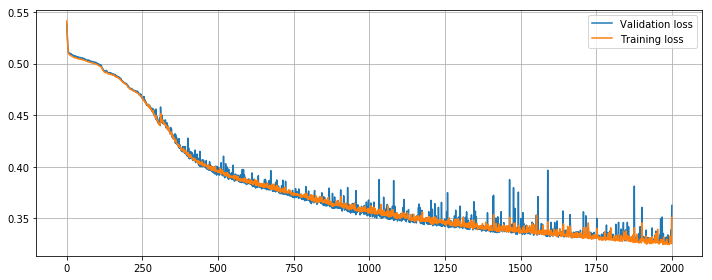

In [10]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [11]:
autoencoder.load_weights('../model_weights/autoencoderV1/run2/autoencoderV1_allfeatures.hdf5')

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [13]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

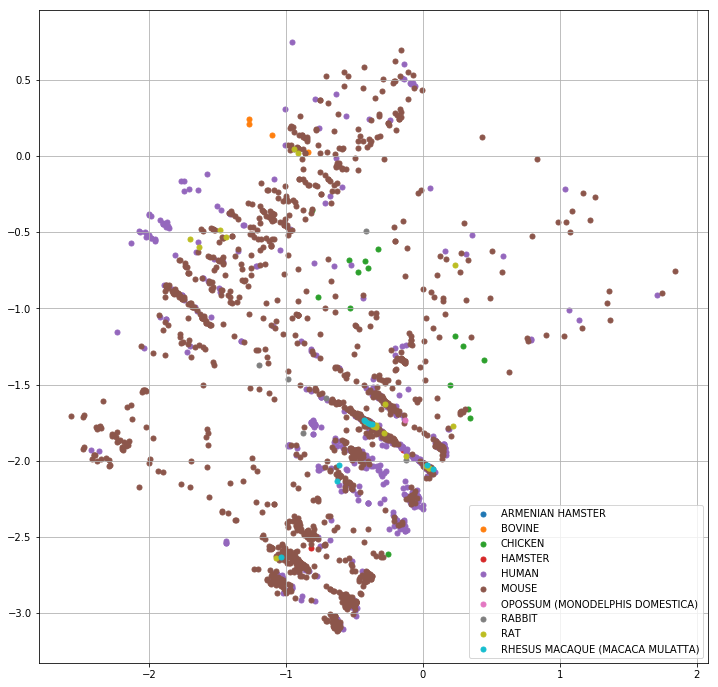

In [14]:
plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    plt.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
plt.legend()
plt.grid()

In [15]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
heavy_chains.load()
light_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')
light_chains.load()

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

Loading in antibody objects


/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


In [16]:
data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=['Latent1', 'Latent2'], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2
P2,64.473820,0.000000,NaN,NaN,-0.852626,-2.741461
P3,73.982970,0.130358,NaN,NaN,-0.583273,-3.047511
P4,64.326010,0.060344,NaN,NaN,-0.747266,-2.035892
P6,74.192370,0.036953,NaN,NaN,-0.320593,-1.792877
P9,72.899025,0.085337,NaN,NaN,-0.381772,-1.526883


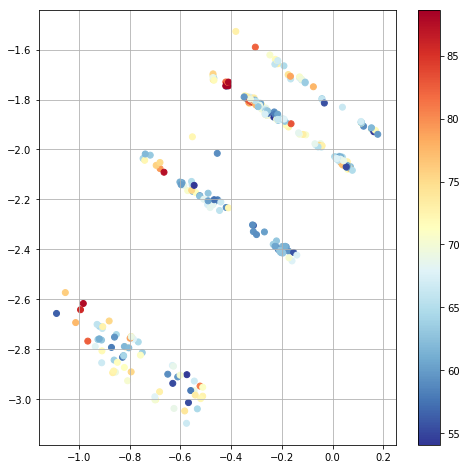

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [18]:
from sklearn.cluster import KMeans

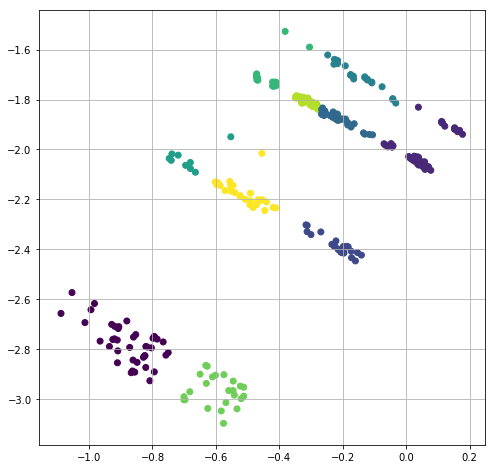

In [29]:
N_CLUSTERS = 10

kmeans = KMeans(N_CLUSTERS, init='random', random_state=23)
kmeans.fit(data[['Latent1','Latent2']])
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=kmeans.predict(data[['Latent1','Latent2']]))
plt.grid()

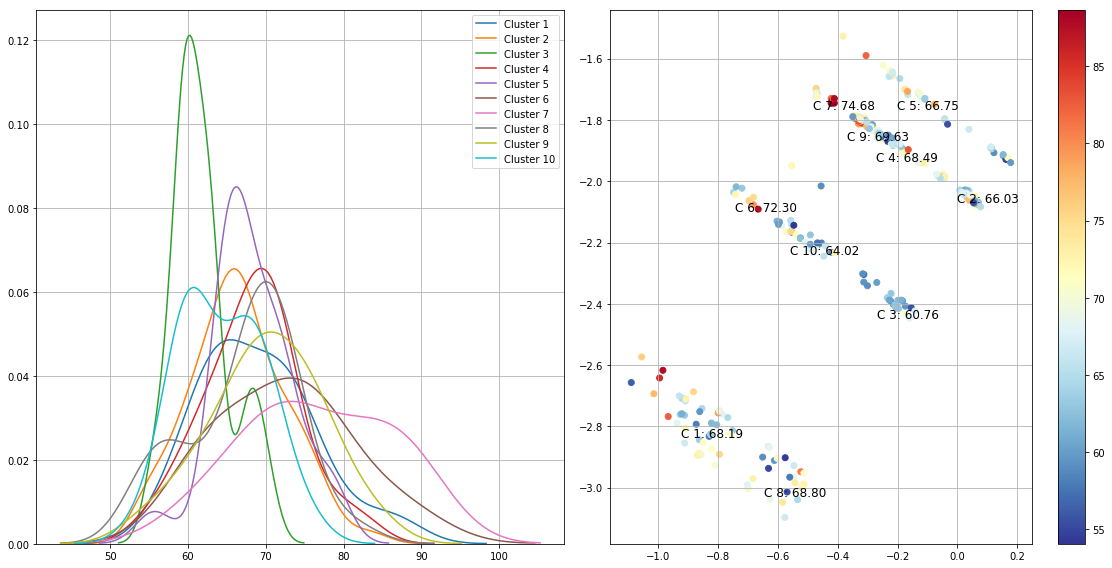

In [30]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(data[['Latent1','Latent2']]) 
tms = ax[1].scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0]-.05, kmeans.cluster_centers_[x][1]-.06,
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()